<a href="https://colab.research.google.com/github/awaw24/Metaheurystyki/blob/main/Metaheurystyki_Lab_2_Zad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install itables
!pip install ace_tools_open

import itables

# Rastrigin function
def rastrigin(x):
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Base hill-climbing algorithm
def hill_climb(func, dim, iterations, n_neighbors, sigma):
    x = np.random.uniform(-5.12, 5.12, size=dim)
    best_val = func(x)
    for _ in range(iterations):
        neighbors = x + np.random.normal(0, sigma, size=(n_neighbors, dim))
        vals = np.apply_along_axis(func, 1, neighbors)
        idx = np.argmin(vals)
        if vals[idx] < best_val:
            x = neighbors[idx]
            best_val = vals[idx]
    return best_val

# Multistart with failure counter algorithm
def multistart_failure(func, dim, iterations, n_neighbors, sigma, max_failures, restarts):
    best_overall = np.inf
    for _ in range(restarts):
        x = np.random.uniform(-5.12, 5.12, size=dim)
        best_val = func(x)
        failures = 0
        for _ in range(iterations):
            neighbors = x + np.random.normal(0, sigma, size=(n_neighbors, dim))
            vals = np.apply_along_axis(func, 1, neighbors)
            idx = np.argmin(vals)
            if vals[idx] < best_val:
                x = neighbors[idx]
                best_val = vals[idx]
                failures = 0
            else:
                failures += 1
                if failures > max_failures:
                    break
        best_overall = min(best_overall, best_val)
    return best_overall

# Experiment parameters
dims = [2, 10]
neighbor_counts = [20, 50]
iterations = 1000
sigma = 0.1
max_failures = 20
restarts = 5
runs = 5

Experiment Results


Loading ITables v2.4.0 from the internet... (need help?)


Loading ITables v2.4.0 from the internet... (need help?)


<Figure size 640x480 with 0 Axes>

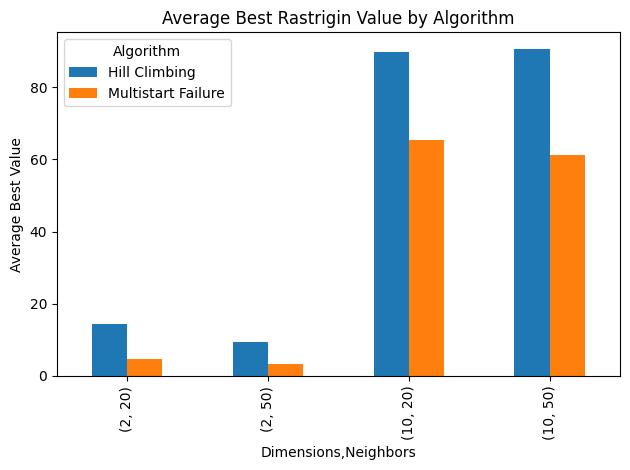

In [7]:
# Collect results
results = []
for alg_name, alg_func in [("Hill Climbing", hill_climb), ("Multistart Failure", multistart_failure)]:
    for dim in dims:
        for n_neighbors in neighbor_counts:
            vals = []
            for _ in range(runs):
                if alg_name == "Hill Climbing":
                    val = alg_func(rastrigin, dim, iterations, n_neighbors, sigma)
                else:
                    val = alg_func(rastrigin, dim, iterations, n_neighbors, sigma, max_failures, restarts)
                vals.append(val)
            results.append({
                "Algorithm": alg_name,
                "Dimensions": dim,
                "Neighbors": n_neighbors,
                "Average Best Value": np.mean(vals),
                "Std Dev": np.std(vals)
            })

df = pd.DataFrame(results)

# Display results
import ace_tools_open as tools;
tools.display_dataframe_to_user(name="Experiment Results", dataframe=df)

itables.show(df, connected=True)

# Plotting bar chart of average best values
plt.figure()
df_pivot = df.pivot_table(index=["Dimensions", "Neighbors"], columns="Algorithm", values="Average Best Value")
df_pivot.plot(kind='bar')
plt.title("Average Best Rastrigin Value by Algorithm")
plt.ylabel("Average Best Value")
plt.tight_layout()
plt.show()

Powyżej znajdują się wyniki porównania podstawowego algorytmu wzrostu (“Hill Climbing”) z jego wariantem z wielostartem i licznikiem porażek (“Multistart Failure”) dla funkcji celu Rastrigina.
Eksperyment przeprowadziłem dla dwóch wymiarów (2 oraz 10) i dwóch wielkości sąsiedztwa (20 oraz 50 punktów), wykonując po 5 symulacji w każdej konfiguracji. Wartości “Average Best Value” to średnie najlepsze uzyskane wyniki, a “Std Dev” to odchylenia standardowe.



**Kluczowe obserwacje:**

* W każdej konfiguracji wariant multistartowy osiąga istotnie niższe (lepsze)
wyniki od prostego hill climbera.

* Zwiększenie liczby punktów sąsiedztwa (20 → 50) poprawia jakość obu algorytmów, zwłaszcza w małej liczbie wymiarów.

* Przy wzroście wymiaru do 10 różnica między algorytmami maleje, ale Multistart Failure nadal dominuje.

**Komentarz:**

* **Zalety Multistart Failure:** dzięki ponownym startom i przerwaniu lokalnego poszukiwania po serii “porażek” unikamy utknięcia w płytkim optimum.

* **Wpływ parametrów:** większe sąsiedztwo (więcej prób) zazwyczaj obniża średnią wartość funkcji, choć kosztem czasu.

* **Wielowymiarowość:** trudność optymalizacji rośnie znacząco przy n=10; nawet wariant ze startami nie schodzi blisko zera w limicie 1000 iteracji.

**Wykonał:** Arkadiusz Pizon

**Nr albumu:** 22267

**Grupa:** MZ04IP1